# Outliers How to Handle it?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('E:\\titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [19]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


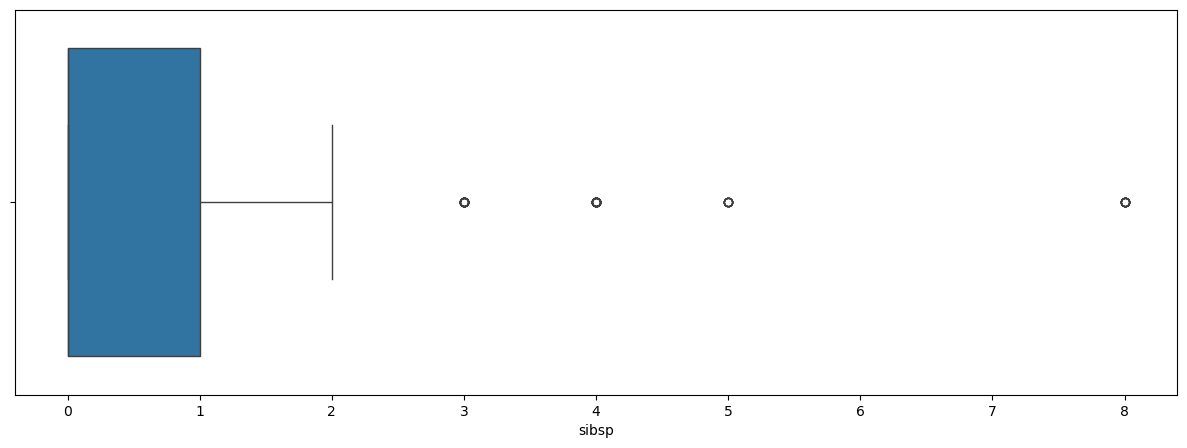

In [20]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = 'sibsp', data=df)
plt.show()

C:\Users\awais\AppData\Local\Temp\ipykernel_2796\160271852.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sibsp'])


<Axes: xlabel='sibsp', ylabel='Density'>

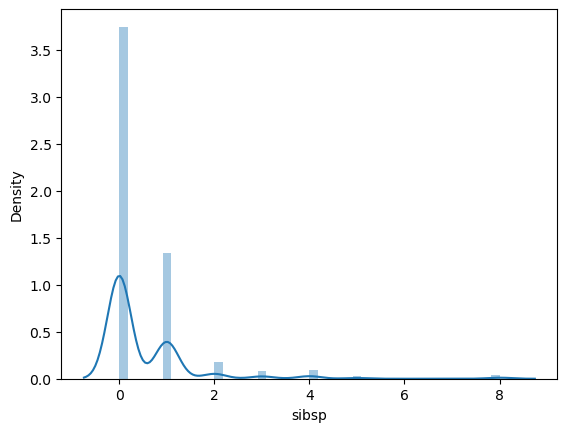

In [21]:
sns.distplot(df['sibsp'])

## IQR method for Removing Outliers

In [22]:
# First Quantile
q1 = df['sibsp'].quantile(0.25)
q1

np.float64(0.0)

In [23]:
q3 = df['sibsp'].quantile(0.75)
q3

np.float64(1.0)

In [24]:
IQR = q3-q1

In [25]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
min_range, max_range

(np.float64(-1.5), np.float64(2.5))

In [27]:
new_df=df[df['sibsp']<=max_range]

In [28]:
new_df.shape

(1252, 14)

In [29]:
df.shape

(1309, 14)

<Axes: ylabel='sibsp'>

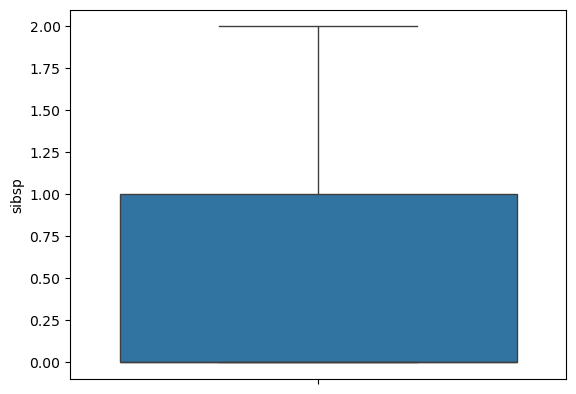

In [31]:
sns.boxplot(new_df['sibsp'])

## Z Score method for removing Outliers

In [4]:
min_range = df['sibsp'].mean() - (3*df['sibsp'].std())
max_range = df['sibsp'].mean() + (3*df['sibsp'].std())

In [5]:
new_data = df[df['sibsp']<=max_range]

In [7]:
new_data.shape

(1272, 14)

<Axes: xlabel='sibsp'>

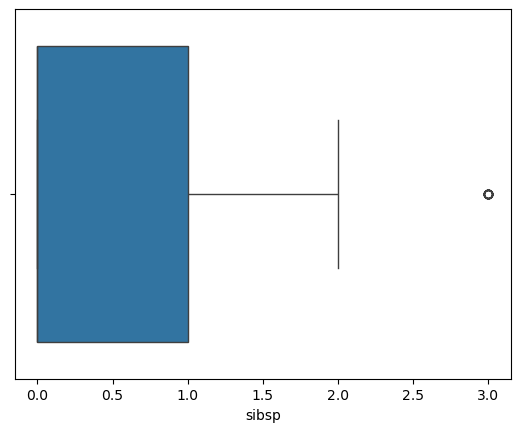

In [8]:
sns.boxplot(x=new_data['sibsp'])

In [9]:
z_score = (df['sibsp'] - df['sibsp'].mean())/df['sibsp'].std()

In [10]:
z_score

0      -0.478904
1       0.481104
2       0.481104
3       0.481104
4       0.481104
          ...   
1304    0.481104
1305    0.481104
1306   -0.478904
1307   -0.478904
1308   -0.478904
Name: sibsp, Length: 1309, dtype: float64

In [11]:
df['Z_Score'] = z_score

In [12]:
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Z_Score
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",-0.478904
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.481104
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0.481104


In [13]:
df[df['Z_Score']<3]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Z_Score
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",-0.478904
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.481104
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0.481104
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0.481104
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0.481104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0.481104
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,0.481104
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,-0.478904
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,-0.478904


# Feature Scaling (Standardization)

In [14]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
Z_Score         0
dtype: int64

In [16]:
df['fare']=df['fare'].fillna(df['fare'].mean())

In [17]:
df['fare'].isnull().sum()

np.int64(0)

C:\Users\awais\AppData\Local\Temp\ipykernel_7904\1193692275.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare'])


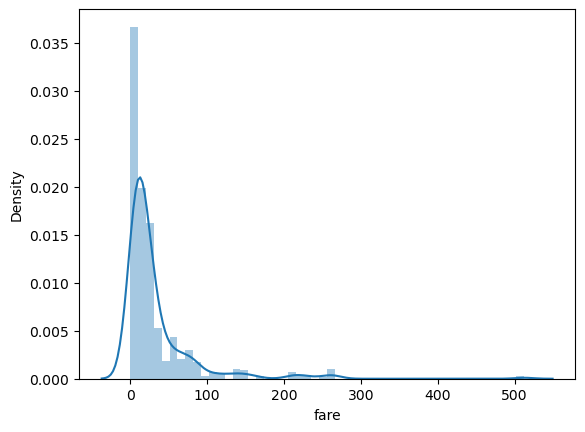

In [18]:
sns.distplot(df['fare'])
plt.show()

In [19]:
df['fare'].describe()

count    1309.000000
mean       33.295479
std        51.738879
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss = StandardScaler()

In [23]:
ss.fit(df[['fare']])

StandardScaler()

In [29]:
df['SS_fare']=pd.DataFrame(ss.transform(df[['fare']]))

In [30]:
df['SS_fare']

0       3.442480
1       2.286476
2       2.286476
3       2.286476
4       2.286476
          ...   
1304   -0.364300
1305   -0.364300
1306   -0.504078
1307   -0.504078
1308   -0.491510
Name: SS_fare, Length: 1309, dtype: float64

In [31]:
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Z_Score,SS_fare
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",-0.478904,3.442480
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.481104,2.286476
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0.481104,2.286476


In [33]:
df[['fare', 'SS_fare']].describe()

,fare,SS_fare
count,1309.000000,1.309000e+03
mean,33.295479,4.342507e-17
std,51.738879,1.000382e+00
min,0.000000,-6.437751e-01
25%,7.895800,-4.911082e-01
50%,14.454200,-3.643001e-01
75%,31.275000,-3.906640e-02
max,512.329200,9.262219e+00


C:\Users\awais\AppData\Local\Temp\ipykernel_7904\2275579056.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SS_fare'])
C:\Users\awais\AppData\Local\Temp\ipykernel_7904\2275579056.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare'])


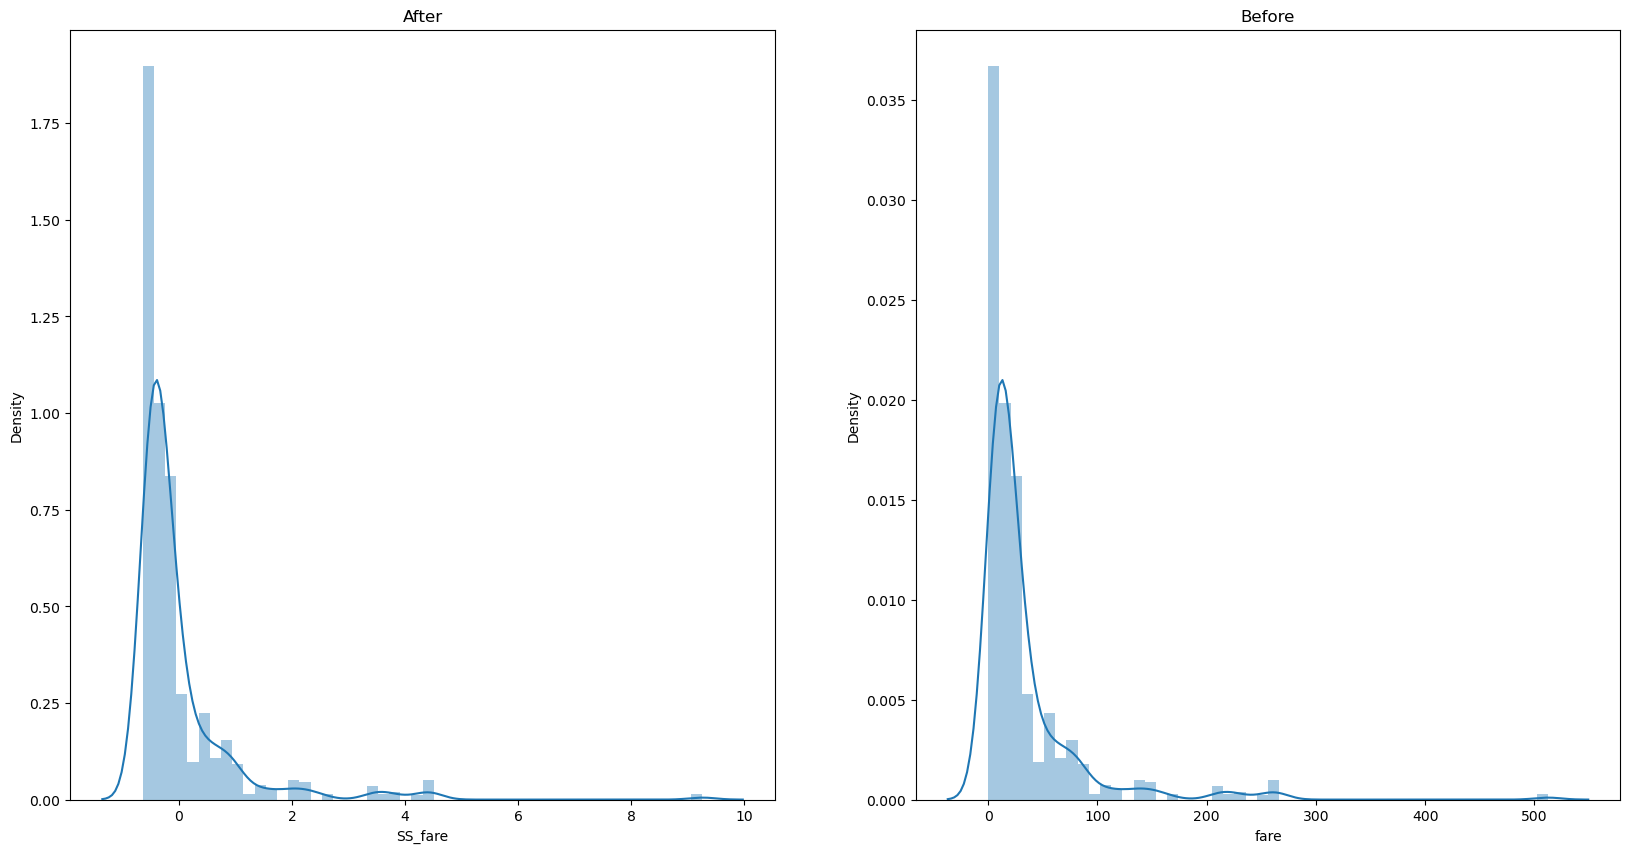

In [36]:
plt.figure(figsize=(20,10))
plt.subplot(1,2, 1)
sns.distplot(df['SS_fare'])
plt.title('After')
plt.subplot(1,2, 2)
sns.distplot(df['fare'])
plt.title('Before')
plt.show()

# Feature Scalling(Normalization)

In [37]:
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Z_Score,SS_fare
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",-0.478904,3.442480
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.481104,2.286476
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0.481104,2.286476
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0.481104,2.286476
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0.481104,2.286476
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",-0.478904,-0.130425
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",0.481104,0.863565
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",-0.478904,-0.643775
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",1.441112,0.351586
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",-0.478904,0.313399


In [38]:
df['ticket'].isnull().sum()

np.int64(0)

In [45]:
from sklearn.preprocessing import MinMaxScaler